<a href="https://colab.research.google.com/github/k23mhadh/DIABETES_ML_PROJECT/blob/data_processing/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJECT AND DATASET DESCRIPTION :**

The aim of this project is to develop a predictive model to identify the likelihood of diabetes based on various health indicators. Using the Diabetes Health Indicators Dataset, we will explore the relationships between demographic factors, lifestyle choices, and health conditions to understand their impact on diabetes risk. By building and evaluating classification models, our goal is to accurately categorize individuals into two groups: no diabetes and diabetes. This analysis will also aim to provide insights into the most significant predictors of diabetes, which could potentially inform preventive health strategies and personalized recommendations for at-risk individuals.

Dataset URL :https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset


**PROJECT INITIALIZATION**

In [32]:
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "diabetes_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

DOWNLOAD THE DATASET

In [33]:
import os
import urllib.request
import zipfile

DOWNLOAD_ROOT = "https://www.kaggle.com/api/v1/datasets/download/alexteboul/diabetes-health-indicators-dataset"
DATA_PATH = os.path.join("datasets", "diabetes")
DATA_URL = DOWNLOAD_ROOT

def fetch_diabetes_data(data_url=DATA_URL, data_path=DATA_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, "diabetes.zip")
    urllib.request.urlretrieve(data_url, zip_path)
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(data_path)
    os.remove(zip_path)

fetch_diabetes_data()


LOAD THE DATASET

In [34]:
import pandas as pd
# fun to load the dataset
def load_diabetes_data(diabetes_path=DATA_PATH):
    csv_path = os.path.join(diabetes_path, "diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
    return pd.read_csv(csv_path)

In [35]:
diabetes = load_diabetes_data()
#Printing the head of dataset
diabetes.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [36]:
# Display general information about the 'diabetes' DataFrame
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [37]:
#Generate descriptive statistics for the numerical columns in the 'diabetes' DataFrame
diabetes.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


DATASET EXPLORATORY ANALYSIS

In [38]:
# Metadata
print("Number of instances:", diabetes.shape[0])
print("Number of features:", diabetes.shape[1] -1)
print("Feature types:\n", diabetes.dtypes)

Number of instances: 70692
Number of features: 21
Feature types:
 Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [39]:
# Comments:
# The dataset contains a substantial number of instances, suitable for building a classification model.
# The features are primarily numerical, with a mix of integers and floats.
# The signification of each feature is indicated on dataset website

In [40]:
# Null/NA values
print("Number of nulls per feature:\n", diabetes.isnull().sum())

Number of nulls per feature:
 Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [41]:
# Interpretation:
# The dataset appears to have no missing values. This is good as it reduces the need for imputation strategies.

Saving figure attribute_histogram_plots


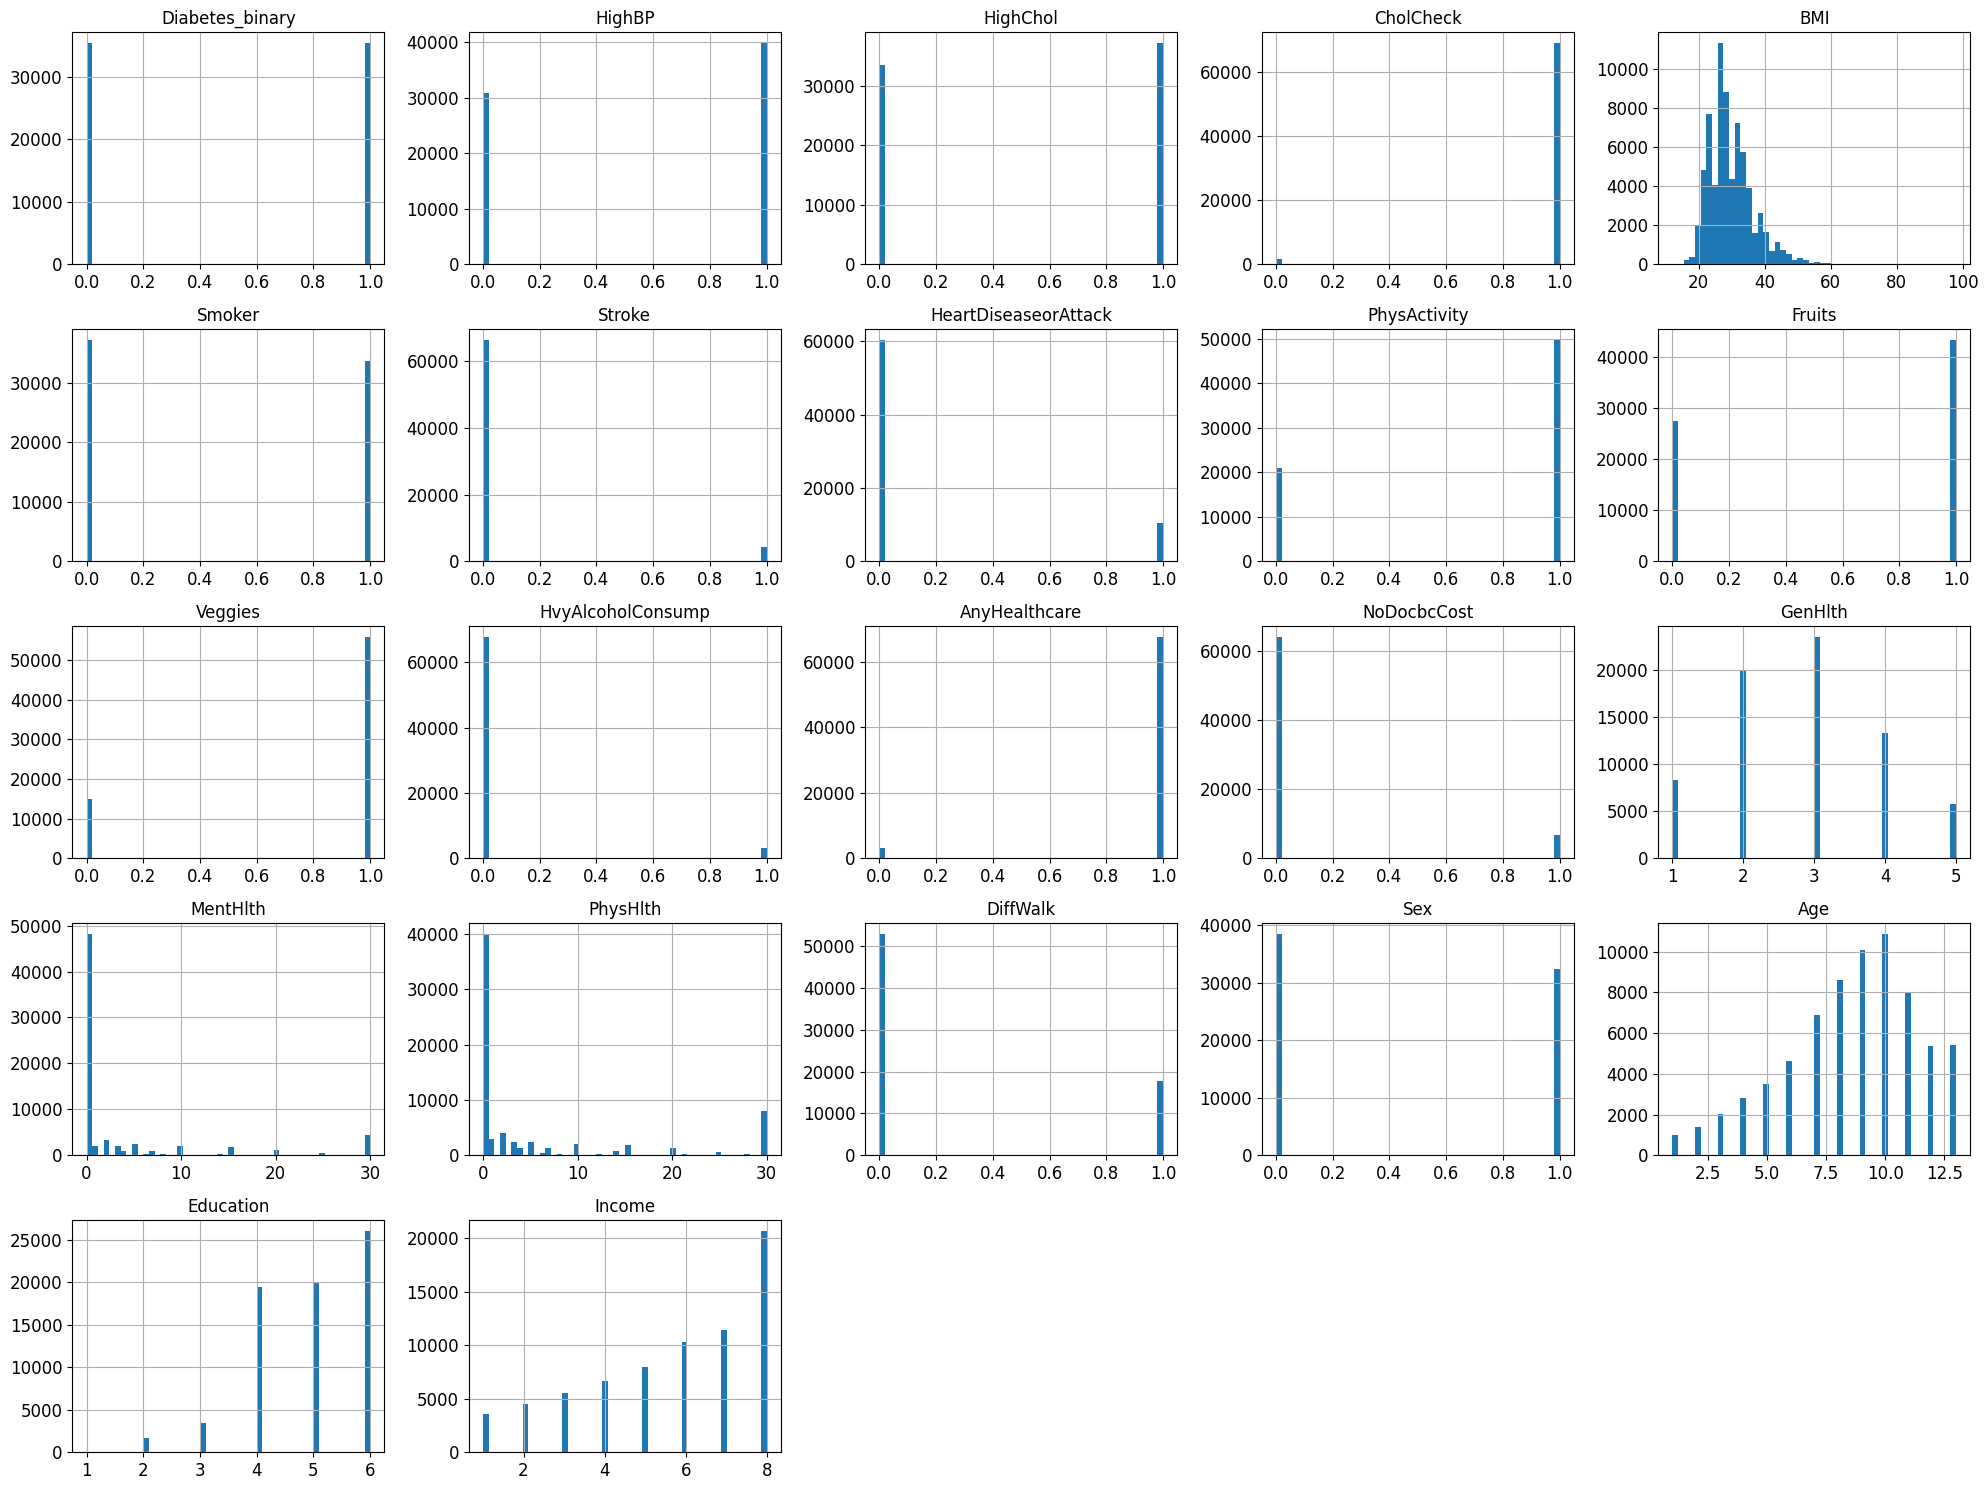

In [42]:
# Feature value distributions
%matplotlib inline
import matplotlib.pyplot as plt
diabetes.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()


In [43]:
# Interpretation (À Modifier) :
# Check for potential outliers using box plots or statistical methods (e.g., IQR).
# If features have different scales, consider standardizing or normalizing them to prevent features with larger values from dominating the model.
# Outliers may require handling depending on their nature and potential impact on model performance.
# Consider removing them or transforming them using methods like Winsorization or robust scaling.

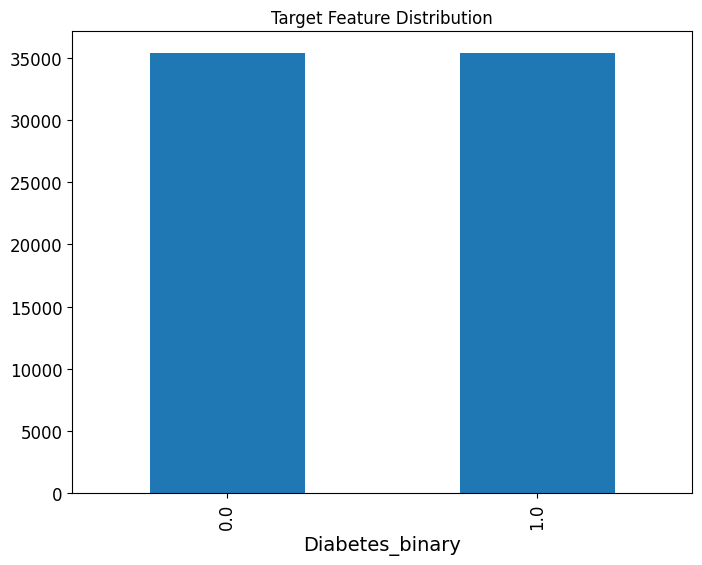

In [44]:
# Target feature study
target_feature = 'Diabetes_binary'
diabetes[target_feature].value_counts().plot(kind='bar', title='Target Feature Distribution', figsize=(8, 6))
plt.show()

In [45]:
# Interpretation and Decision:
# The target class is balanced , This is ideal because it ensures that the model will not be biased toward the majority class (in case of inbalanced).


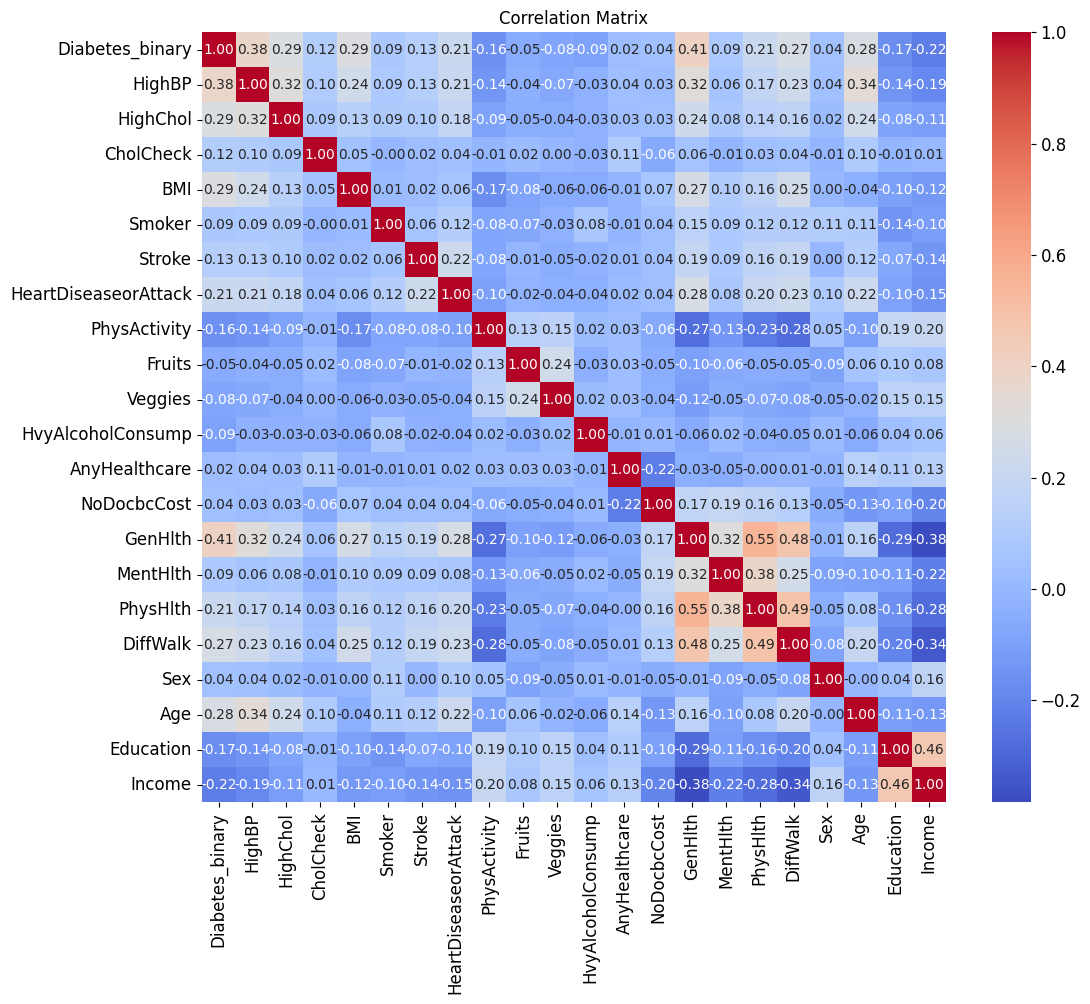

In [46]:
# Feature correlation, selection, dimension reduction, and anomaly detection (À modifier)
correlation_matrix = diabetes.corr()
plt.figure(figsize=(12, 10))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Interpretation and Decisions:
# Analyze the correlation matrix to identify strongly correlated features.
# High correlation between features may indicate redundancy or multicollinearity, which can affect model performance.
# Consider feature selection techniques (e.g., recursive feature elimination) to remove irrelevant or redundant features.
# Dimensionality reduction techniques like PCA can be used to reduce the number of features while retaining most of the information.
# Analyze potential anomalies or unexpected patterns in the data through visualization and statistical methods.

# Interpretations, hypotheses, and conclusions
# Based on the EDA, formulate hypotheses about the relationships between features and the target variable.
# Draw conclusions about the overall data quality and potential challenges or opportunities for building a predictive model.
# For example, you might conclude that the dataset has some imbalanced classes that needs to be addressed during model training.
# You might also identify potential features that are highly predictive of diabetes.
